# 🧾 Task 7: Basic Sales Summary Using SQLite and Python

**Objective**: Use SQL inside Python to pull simple sales info and display it with print and a bar chart.


In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

sample_data = [
    ('Apples', 50, 2.5),
    ('Oranges', 30, 3.0),
    ('Bananas', 40, 1.5),
    ('Grapes', 20, 4.0),
    ('Mangoes', 25, 5.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [10]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    ROUND(SUM(quantity * price), 2) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
conn.close()

df

,product,total_qty,revenue
0,Apples,50,125.0
1,Bananas,40,60.0
2,Grapes,20,80.0
3,Mangoes,25,125.0
4,Oranges,30,90.0


Sales Summary:

   product  total_qty  revenue
0   Apples         50    125.0
1  Bananas         40     60.0
2   Grapes         20     80.0
3  Mangoes         25    125.0
4  Oranges         30     90.0


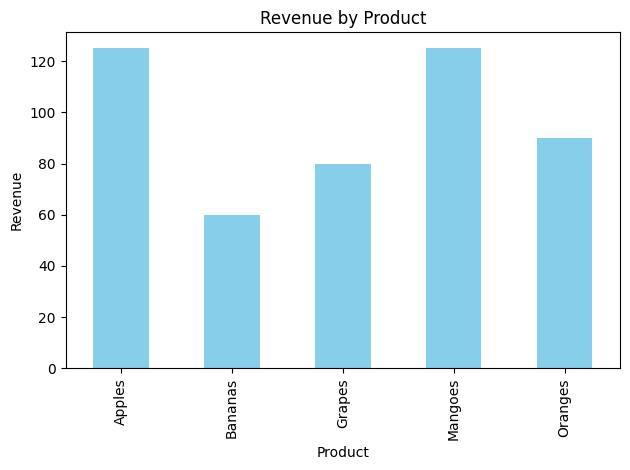

In [6]:
print("Sales Summary:\n")
print(df)

df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()